In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from sklearn.decomposition import PCA

Wczytanie danych

In [128]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
f = urllib.request.urlopen(link)
data = pd.read_csv(f, sep=",", header=None)
data.columns = ["class", "Alcohol", "Malic.acid", "Ash", "Alcalinity.of.ash", "Magnesium", "Total.phenols", "Flavanoids", "Nonflavanoid.phenols", "Proanthocyanins", "Color.intensity", "Hue", "OD280OD315.of.diluted.wines", "Proline"]
data.head()

,class,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanins,Color.intensity,Hue,OD280OD315.of.diluted.wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Wykonanie PCA.

In [129]:
pca = PCA()
pca_fitted = pca.fit_transform(data.iloc[:,1:])
pca_data = pd.DataFrame(pca_fitted)
#wyliczenie skumulowanych odchyleń standardowych
cumulative_std = np.cumsum(np.sqrt(pca.explained_variance_))

Wykreślenie zależności skumulowanego odchylenia standardowego od liczby składowych głównych.

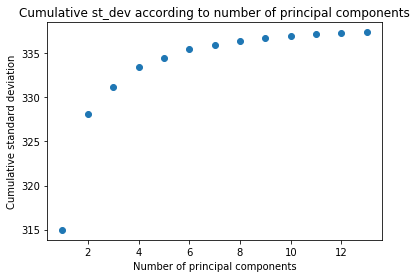

In [130]:
fig, ax = plt.subplots()
ax.plot(range(1, len(data.columns)), cumulative_std, 'o')
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Cumulative standard deviation')
ax.set_title('Cumulative st_dev according to number of principal components')
plt.show()

Jak widać, pierwsze składowe główne zawierają większość całkowitego odchylenia standarowego.

Wykreślenie punktów w nowych zmiennych otrzymanych z PCA. Pierwszy wykres przedstawia dwie pierwsze składowe główne, a drugi - drugą i trzecią składową główną.

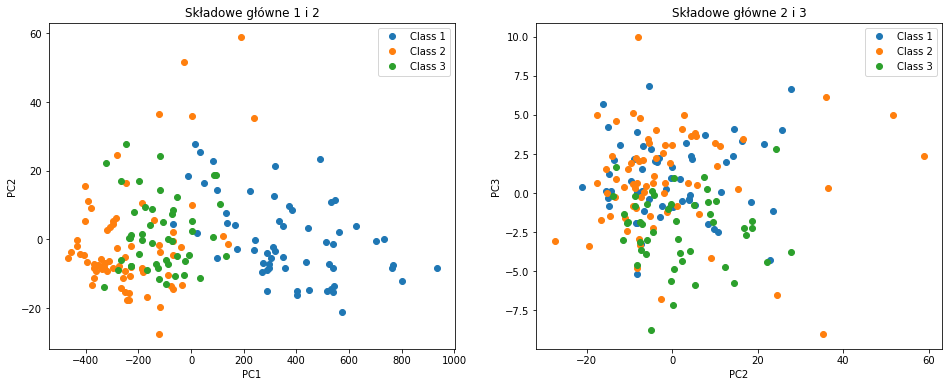

In [131]:
class_1 = pca_data.loc[data['class'] == 1]
class_2 = pca_data.loc[data['class'] == 2]
class_3 = pca_data.loc[data['class'] == 3]
fig, axs = plt.subplots(1,2, figsize = (16, 6))
axs[0].plot(class_1.iloc[:,0], class_1.iloc[:,1], 'o', label = 'Class 1')
axs[0].plot(class_2.iloc[:,0], class_2.iloc[:,1], 'o', label = 'Class 2')
axs[0].plot(class_3.iloc[:,0], class_3.iloc[:,1], 'o', label = 'Class 3')
axs[1].plot(class_1.iloc[:,1], class_1.iloc[:,2], 'o', label = 'Class 1')
axs[1].plot(class_2.iloc[:,1], class_2.iloc[:,2], 'o', label = 'Class 2')
axs[1].plot(class_3.iloc[:,1], class_3.iloc[:,2], 'o', label = 'Class 3')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[1].set_xlabel('PC2')
axs[1].set_ylabel('PC3')
axs[0].set_title('Składowe główne 1 i 2')
axs[1].set_title('Składowe główne 2 i 3')
axs[0].legend()
axs[1].legend()

Porównując oba wykresy można zauważyć, że w przypadku pierwszych dwóch składowych głównych o wiele łatwiej wyodrębnić skupienia poszczególnych klas w porównaniu do rzutowania danych na drugą i trzecią zmienną.